# *k*-Nearest Neighbours 
Hogeschool Utrecht (c) 2020

Tijmen Muller (tijmen.muller@hu.nl) en nabewerking Joost Vanstreels (joost.vanstreels@hu.nl)

In dit notebook vind je 2 opdrachten:
- <a href="#knn_opdracht1"> Opdracht 1 </a> laat eerst het voorbeeld zien uit het video-college. Vervolgens moet je zelf aan de slag. Onderaan deze opdracht worden hints gegeven, maar het is belangrijk dat je eerst zelf nadenkt!
- <a href="knn_opdracht2"> Opdracht 2 </a> maken we in het college.

<a id="knn_opdracht1"> </a>
## Opdracht 1
Het voorbeeld hieronder werd ook in het videocollege getoond. De score van dit baseline model is nog niet goed genoeg. Aan jullie de taak om dit model te verbeteren!

Daar zijn verschillende manieren voor. Probeer eerst zelf te bedenken welke verbeteringen je kunt doorvoeren op deze implementatie om de high-score omhoog te krikken. Als dat niet lukt, kun je onderaan een aantal hints bekijken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

## Data inlezen

In [2]:
# inlezen tabel met fruit gegevens
fruits = pd.read_table('knn_fruit.txt')
print('Aantal meetwaarden {0:d}'.format(len(fruits)))
fruits.head()

Aantal meetwaarden 59


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.value_counts(["fruit_name"])

fruit_name
apple         19
orange        19
lemon         16
mandarin       5
Name: count, dtype: int64

De kolommen zijn als volgt:
* `fruit_label` is een identificatienummer, overeenkomend met `fruit_name`
* `fruit_name` is het fruittype
* `fruit_subtype` is het subtype (bijvoorbeeld het soort appel)
* `mass` is het gewicht in grammen
* `width` is de breedte in cm
* `height` is de hoogte in cm
* `color_score` is een waarde uit het kleuren spectrum:
  * groen: 0.45-0.65
  * geel: 0.65-0.75
  * oranje: 0.75-0.85
  * rood: 0.85-1.00

In [4]:
# maak een dictionary van fruit_label naar fruit_name
lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(),fruits['fruit_name'].unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Aanpak volgens werkwijze `scikit-learn`

### 1. Kies het modeltype

We kiezen _k_-Nearest Neighbours (`KNeighborsClassifier`)

In [5]:
knn = KNeighborsClassifier()

### 2. Organiseer de data

Onze feature matrix `X` bestaat uit de kolommen `mass`, `width` en `height`: dit zijn de kenmerken waar _vanuit_ we willen voorspellen.

Onze target vector `y` bestaat uit de kolom `fruit_label`: dit is het resultaat waar we _naartoe_ willen voorspellen (bij _k_-NN moet deze numeriek zijn, ookal is het een klasse).

In [6]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

### 3. Creëer een train- en validatieset

De methode `sklearn.model_selection.train_test_split()` deelt de feature matrix en de result vector gerandomiseerd op in een train- en een validatieset (ook wel: testset).

In [7]:
# splits in train en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(f'{len(X_train)} trainwaarden, {len(X_test)} testwaarden: {len(X_train)*100/len(fruits):.1f}%/{len(X_test)*100/len(fruits):.1f}%')

44 trainwaarden, 15 testwaarden: 74.6%/25.4%


### 4. Kies de hyperparameters

In [8]:
knn.set_params(n_neighbors = 5, weights = 'uniform')

KNeighborsClassifier()

### 5. Train het model

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### 6. Valideer het model

Het model is te valideren met de validatieset. Het model heeft de validatieset nog niet gezien (alleen de trainset is gebruikt om het model te trainen). Het model kan de resultaten voorspellen op de _feature matrix_ van de validatieset. Door de uitkomsten (voorspeld resultaat) te vergelijken met de _target vector_ van de validatieset (de échte waarden) kunnen we zien hoe goed het model voorspeld.

We kunnen de methode `sklearn.metrics.accuracy_score()` gebruiken om de voorspelde waarde en de echte waarde te vergelijken, dit geeft een percentage 'goed voorspeld'. _k_-NN heeft ook zijn eigen methode `score()`, deze doet hetzelfde.

In [10]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.5333333333333333

In [11]:
knn.score(X_test,y_test)

0.5333333333333333

53% is natuurlijk niet zo'n goede score. Om te bepalen _hoe_ goed (of slecht) de score is, is het goed om na te denken over een baseline. Als we heel naïef/dom zouden voorspellen, wat voor score zouden we dan behalen? In dit voorbeeld zouden we bijvoorbeeld kunnen kijken welk fruittype het vaakst voorkomt en elk stuk fruit in die klasse plaatsen (best dom, toch?).

In [12]:
fruits.groupby('fruit_name').count()

,fruit_label,fruit_subtype,mass,width,height,color_score
fruit_name,,,,,,
apple,19,19,19,19,19,19
lemon,16,16,16,16,16,16
mandarin,5,5,5,5,5,5
orange,19,19,19,19,19,19


'apple' en 'orange' komen het vaakst voor, laten we 'orange' kiezen. Deze heeft `fruit_label` = 3, dus in onze 'naieve' voorspelling is het resultaat _altijd_ een 3.

In [13]:
y_naive = np.full(len(y_pred), 3)
print(f"Resultaatvector bij 'dom' voorspellen: {y_naive}\nBaseline score: {accuracy_score(y_test, y_naive)}")

Resultaatvector bij 'dom' voorspellen: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Baseline score: 0.5333333333333333


Dus als we naief voorspellen, behalen we dezelfde score! Dat is niet best...

Een andere handige referentie is de score op de *trainset*. Dit zijn de waardes _waarop_ het model heeft getraind, dus hierop zou het model natuurlijk goed moeten scoren (het model heeft zich immers op die waarden gebaseerd).

In [14]:
y_train_pred = knn.predict(X_train)
print(f"Score bij voorspellen op de trainset: {accuracy_score(y_train, y_train_pred)}")

Score bij voorspellen op de trainset: 0.7954545454545454


Dat is een veel betere voorspellingsscore -- blijkbaar voorspelt het model op de trainingswaarden wél goed en op de validatiewaarden niet. In zo'n geval zou er sprake kunnen zijn van _overfitting_.

Nu willen we natuurlijk graag inzicht  _waarom_ het model niet goed scoort. Bij classificatie kunnen we daarvoor een confusion matrix gebruiken: deze vergelijkt de voorspelde waarde met de echte waarde. We kunnen dit doen met de methode `sklearn.metrics.confusion_matrix()` (geeft een NumPy `array` terug) en vervolgens visualiseren met bijvoorbeeld Seaborn.

In [15]:
cm = confusion_matrix(y_test, y_pred)

# Maak van de array een pandas dataframe om te visualiseren
df_cm = pd.DataFrame(cm, 
                     index = [lookup_fruit_name[i+1] for i in range(4)], 
                     columns = [lookup_fruit_name[i+1] for i in range(4)])

print(cm)
df_cm

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]


,apple,mandarin,orange,lemon
apple,3,0,0,1
mandarin,0,1,0,0
orange,3,0,3,2
lemon,0,0,1,1


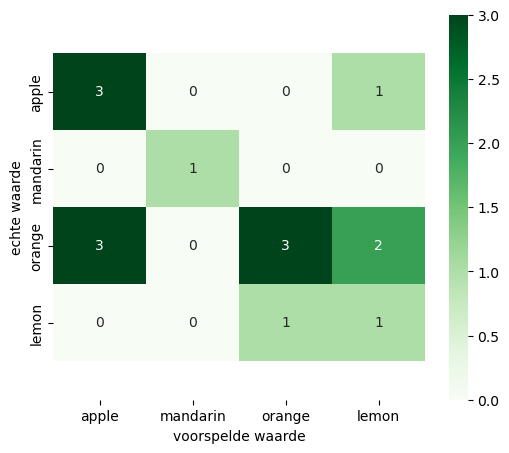

In [16]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax = sns.heatmap(df_cm, annot=True, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('voorspelde waarde')
ax.set_ylabel('echte waarde')

plt.show()

### 7. Voorspel nieuwe data

We kunnen nu het fruittype voorspellen van een nieuw meetpunt op basis van de kenmerken `mass`, `width` en `length` (met helaas maar een lage betrouwbaarheid, vanwege de lage voorspellingsscore). Bijvoorbeeld: wat voor fruittype is een nieuw stuk fruit met massa 150, breedte 6.5 en hoogte 7?

In [17]:
fruit_feat = [150,6.5,7.0]
fruit_pred = knn.predict([fruit_feat])
print(fruit_pred)
print(f"Voorspelling: fruit_label = {fruit_pred[0]}, fruit_name = {lookup_fruit_name[fruit_pred[0]]}")

[1]
Voorspelling: fruit_label = 1, fruit_name = apple


/Users/rianne/opt/anaconda3/envs/cm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Als je niet beter zou weten, zou je klakkeloos aannemen dat dit stuk fruit een appel is. Maar als je kijkt naar de waarschijnlijkheden van de voorspelling, zie je dat het model niet zo zeker van z'n zaak is.

In [18]:
fruit_pred_proba = knn.predict_proba([fruit_feat])
print(fruit_pred_proba)
print(f"Voorspelling: fruit_label_proba = {fruit_pred_proba[0,0]}, fruit_name = {lookup_fruit_name[1]}")
print(f"Voorspelling: fruit_label_proba = {fruit_pred_proba[0,1]}, fruit_name = {lookup_fruit_name[2]}")
print(f"Voorspelling: fruit_label_proba = {fruit_pred_proba[0,2]}, fruit_name = {lookup_fruit_name[3]}")
print(f"Voorspelling: fruit_label_proba = {fruit_pred_proba[0,3]}, fruit_name = {lookup_fruit_name[4]}")

[[0.4 0.  0.4 0.2]]
Voorspelling: fruit_label_proba = 0.4, fruit_name = apple
Voorspelling: fruit_label_proba = 0.0, fruit_name = mandarin
Voorspelling: fruit_label_proba = 0.4, fruit_name = orange
Voorspelling: fruit_label_proba = 0.2, fruit_name = lemon


/Users/rianne/opt/anaconda3/envs/cm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Oefening

Bedenk verschillende aanpassingen die een beter resultaat zouden kunnen opleveren. Voer een variant uit en verifieer het resultaat. Het is mogelijk om een score van 1.0 op deze testset te halen!

Merk op: probeer eerst zelf op basis van de theorie van de afgelopen colleges na te denken over acties die je uit kunt voeren om een model te verbeteren. Denk bijvoorbeeld aan de Supervised Learning workflow!

## SPOILER ALERT


##

##

##

##

##

## HIERONDER STAAN DE TIPS


##

##

##

##

##
## DENK EERST ZELF NA!

#### Verbetering 1. Hyperparameters aanpassen.
In het voorbeeld wordt _k_ = 5 gekozen. Controleer of er verbetering is als je een andere waarde voor _k_ kiest.

In [19]:
for k in range(1,10):
        knn.set_params(n_neighbors = k)
        knn.fit(X_train, y_train)
        print("k is {}, accuracy = {}".format(k, accuracy_score(y_test, knn.predict(X_test))))

k is 1, accuracy = 0.6
k is 2, accuracy = 0.5333333333333333
k is 3, accuracy = 0.5333333333333333
k is 4, accuracy = 0.5333333333333333
k is 5, accuracy = 0.5333333333333333
k is 6, accuracy = 0.5333333333333333
k is 7, accuracy = 0.5333333333333333
k is 8, accuracy = 0.4666666666666667
k is 9, accuracy = 0.5333333333333333


In [20]:
for k in range(1,10):
    for gewicht in ['uniform', 'distance']:
        knn.set_params(n_neighbors = k, weights = gewicht)
        knn.fit(X_train, y_train)
        print("k is {}, gewicht is {}: accuracy = {}".format(k,gewicht, accuracy_score(y_test, knn.predict(X_test))))

k is 1, gewicht is uniform: accuracy = 0.6
k is 1, gewicht is distance: accuracy = 0.6
k is 2, gewicht is uniform: accuracy = 0.5333333333333333
k is 2, gewicht is distance: accuracy = 0.6
k is 3, gewicht is uniform: accuracy = 0.5333333333333333
k is 3, gewicht is distance: accuracy = 0.6666666666666666
k is 4, gewicht is uniform: accuracy = 0.5333333333333333
k is 4, gewicht is distance: accuracy = 0.7333333333333333
k is 5, gewicht is uniform: accuracy = 0.5333333333333333
k is 5, gewicht is distance: accuracy = 0.6
k is 6, gewicht is uniform: accuracy = 0.5333333333333333
k is 6, gewicht is distance: accuracy = 0.6
k is 7, gewicht is uniform: accuracy = 0.5333333333333333
k is 7, gewicht is distance: accuracy = 0.6666666666666666
k is 8, gewicht is uniform: accuracy = 0.4666666666666667
k is 8, gewicht is distance: accuracy = 0.6666666666666666
k is 9, gewicht is uniform: accuracy = 0.5333333333333333
k is 9, gewicht is distance: accuracy = 0.6666666666666666


#### Verbetering 2. Features toevoegen.

In het voorbeeld worden alleen `mass`, `width`, `height` als feature gebruikt. Controleer of er verbetering is als je `color_score` toevoegt.

In [21]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [22]:
X = fruits.loc[:,['mass','width','height','color_score']]
y = fruits['fruit_label']

X_train, X_test,y_train, y_test = train_test_split(X, y)
knn.set_params(n_neighbors = 5)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.6666666666666666

#### Verbetering 3. Normaliseren

In het voorbeeld zijn de features niet genormaliseerd. Controleer of er verbetering is als je de features normaliseert.

In [23]:
from scipy import stats

fruits['mass_z'] = stats.zscore(fruits['mass'])
fruits['width_z'] = stats.zscore(fruits['width'])
fruits['height_z'] = stats.zscore(fruits['height'])
fruits['color_score_z'] = stats.zscore(fruits['color_score'])

In [24]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,mass_z,width_z,height_z,color_score_z
0,1,apple,granny_smith,192,8.4,7.3,0.55,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,granny_smith,180,8.0,6.8,0.59,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,granny_smith,176,7.4,7.2,0.60,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,mandarin,86,6.2,4.7,0.80,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,mandarin,84,6.0,4.6,0.79,-1.450372,-1.364327,-2.292236,0.355872


In [25]:
X = fruits.loc[:,['mass_z','width_z','height_z','color_score_z']]
y = fruits['fruit_label']

X_train, X_test,y_train, y_test = train_test_split(X, y)
knn.set_params(n_neighbors = 5)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.9333333333333333

#### Verbetering 4. Hyperparameters nog verder aanpassen.
In het voorbeeld wordt met een uniforme gewicht gewerkt. Wat gebeurt er als je het gewicht laat afhangen van de distance?

Tip: speel ook nog even met de hoogte voor k

In [26]:
for k in range(1,10):
    for gewicht in ['uniform', 'distance']:
        knn.set_params(n_neighbors = k, weights = gewicht)
        knn.fit(X_train, y_train)
        print("k is {}, gewicht is {}: accuracy = {}".format(k,gewicht, accuracy_score(y_test, knn.predict(X_test))))

k is 1, gewicht is uniform: accuracy = 0.9333333333333333
k is 1, gewicht is distance: accuracy = 0.9333333333333333
k is 2, gewicht is uniform: accuracy = 0.9333333333333333
k is 2, gewicht is distance: accuracy = 0.9333333333333333
k is 3, gewicht is uniform: accuracy = 0.9333333333333333
k is 3, gewicht is distance: accuracy = 0.9333333333333333
k is 4, gewicht is uniform: accuracy = 0.8666666666666667
k is 4, gewicht is distance: accuracy = 0.9333333333333333
k is 5, gewicht is uniform: accuracy = 0.9333333333333333
k is 5, gewicht is distance: accuracy = 0.9333333333333333
k is 6, gewicht is uniform: accuracy = 0.9333333333333333
k is 6, gewicht is distance: accuracy = 1.0
k is 7, gewicht is uniform: accuracy = 1.0
k is 7, gewicht is distance: accuracy = 1.0
k is 8, gewicht is uniform: accuracy = 1.0
k is 8, gewicht is distance: accuracy = 1.0
k is 9, gewicht is uniform: accuracy = 0.8666666666666667
k is 9, gewicht is distance: accuracy = 1.0


<a id="knn_opdracht2"></a>
## Opdracht 2

Tijdens het college gaan we met z'n allen kijken naar de bekende MNIST (Modified National Institute of Standards and Technology) data set. Deze data set zit standaard in sklearn.datasets en bevat afbeeldingen (van 8 x 8 = 64 pixels) van handgeschreven cijfers. Elke pixel heeft een integer waarde die de grijswaarde aangeeft van 0 (wit) tot 16 (zwart).

Ons doel is om met behulp van k-NN van een nieuw afbeelding te kunnen voorspellen welk cijfer er geschreven is.

#### Initialisatie
In de cell hieronder zetten we alle statements die packages inladen netjes bij elkaar. In de loop van het college zullen we hier nog een en ander aan toe moeten voegen.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

#### Inlezen van de data
In sci kit learn (sklearn) is een submodule datasets. Data sets worden steeds als functie gegeven: door het uitvoeren van de functie krijg je je data en nog wat extra zaken, zoals een beschrijving.
Hieronder laden we de data alvast in.

In [28]:
data = load_digits()

#### Verkenning van de data
Nu gaan we aan de slag om de data te verkennen. Bekijk eerst hoe het data object is opgebouwd dat load_digits() teruggeeft. Probeer dan te achterhalen hoeveel datapunten (afbeeldingen) we hebben, en hoe de cijfers relateren aan plaatjes van handgeschreven cijfers. Voor dit laatste een tip: matplotlib.pyplot heeft een commando 'imshow'.  

In [29]:
print(str(data))

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [30]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [31]:
print(type(data.data))
print(type(data.target))
print(type(data.images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
print(data.data.shape)
print(data.target.shape)
print(data.images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


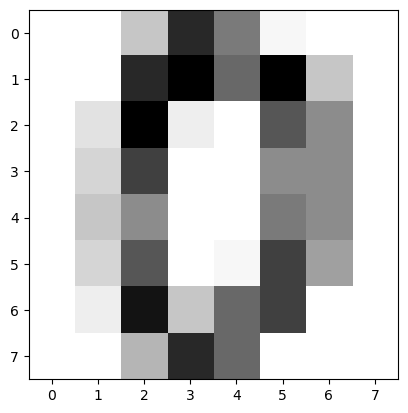

In [33]:
plt.imshow(data.images[0], cmap = "Greys")

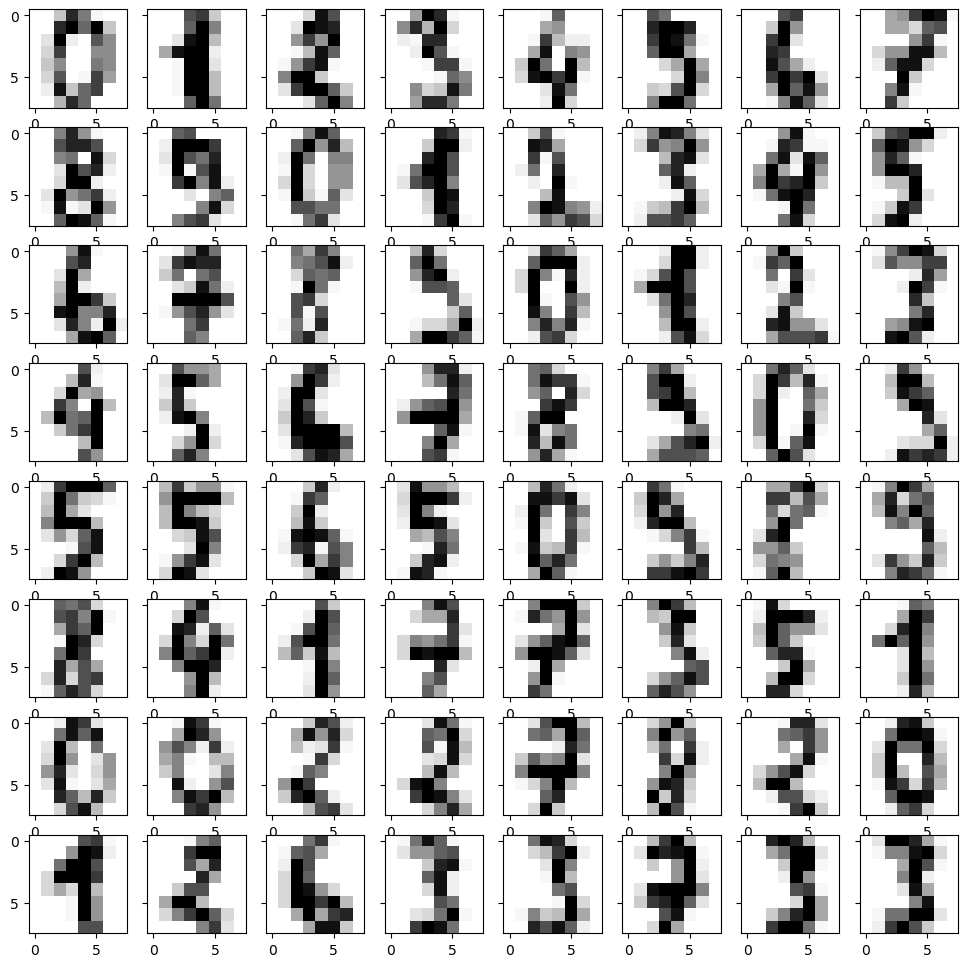

In [34]:
f, axes = plt.subplots(8, 8, sharey=True, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axes[i,j].imshow(data.images[8*i+j], cmap = "Greys")

### Opdracht 2a
We willen niet alleen een classifier trainen, we willen ook weten hoe goed ie het doet. Splits daarom nu de data in een train set (80% van de observaties) en een test set (20% van de observaties). De train set gaan we gebruiken om het algoritme te trainen, de test set om te kijken wat de nauwkeurigheid van dit algoritme is.

**Let op**: denk eerst goed na wat de *features* zijn en wat de *target* is. In de cellen hierboven kun je dat zien en zo bepalen hoe de train- en testdata gemaakt kan worden. 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, \
                                                    random_state = 12345)
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(data.images, data.target, test_size=0.20, \
                                                    random_state = 12345)

### Opdracht 2b
Nu gaan we onze classifier trainen met k-NN. Dat betekent het algoritme gaat zoeken naar plaatjes die *het dichtsbij* liggen. Voor twee plaatjes zal er voor alle pixels gekeken worden wat de afstand is en wordt de totale afstand berekend. De labels van de plaatjes waarvan de totale afstand het kleinste is, worden gebruikt om het label van het nieuwe plaatje te voorspellen.

Een belangrijke keuze hierbij is afstandsfunctie die we gebruiken om te bepalen of twee plaatjes op elkaar lijken. Wij zullen de (default) Minkowski afstand gebruiken. Als je niet weet wat de Minkowski afstand is, zoek dat dan even op. 

Wat betekent dit voor twee afbeeldingen? Een afbeelding bestaat feitelijk uit 8 vectoren van 8 cijfers: 8x8 pixels. Maar we hebben tot nu toe altijd gewerkt met tabellen uit .csv bestanden... Daarom gaan we gebruik maken van data.data en niet van data.images want in data.data staat alle pixels op een rij van 64 cijfers, eigenlijk als een soort tabel! Als je in de vorige stap images hebt gebruikt, dan moet je dit dus even wijzigen.

Enfin, de opdracht dus: voer nu het trainen van k-NN uit!

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Opdracht 2c
Bereken nu de accuracy van onze classifier op de test set. Welk percentage van de cijfers wordt goed voorspeld? Wat vind je van dit percentage?

In [37]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9944444444444445

Laten we als extra check ook even wat plaatjes bekijken uit onze test set en daarbij het voorspelde cijfer en het werkelijke cijfer. 

Voorspelde waarden:  [1 0 5 1 4 5 5 4 0 1 0 3 0 8 8 7 4 0 2 1 2 5 1 6 8 6 6 3 7 9 8 3]
Echte waarden:       [1 0 5 1 4 5 5 4 0 1 0 3 0 8 8 7 4 0 2 1 2 5 1 6 8 6 6 3 7 9 8 3]


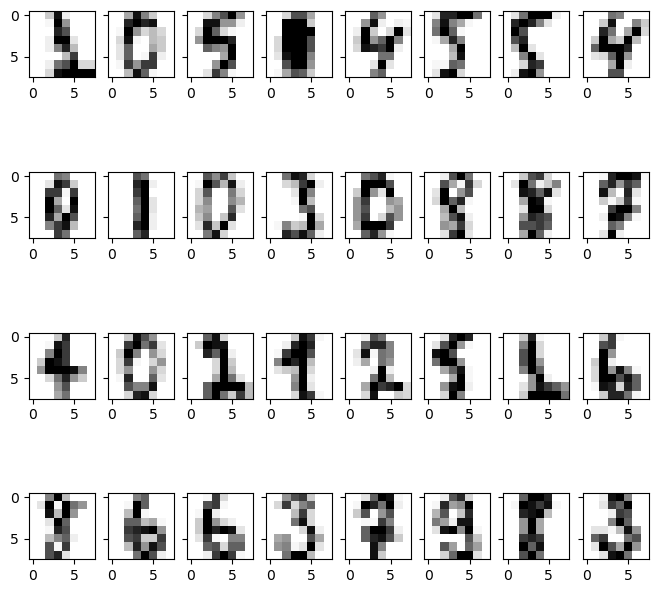

In [38]:
f, axes = plt.subplots(4, 8, sharey=True, figsize=(8, 8))
for i in range(4):
    for j in range(8):
        axes[i,j].imshow(X_test[8*i+j].reshape([8,8]), cmap = "Greys")
print('Voorspelde waarden: ', knn_pred[0:32])
print('Echte waarden:      ', y_test[0:32])

### Extra opgaven
- Er zijn ook andere afstandsfuncties. Kijk wat de impact is op de accuracy.
- Hoe goed kun je classificeren als je alleen de onderste helft van de plaatjes mag gebruiken?
- Voor het eerste cijfer van de test set, wat zijn de 5 buren? Wat was de bijbehorende target van die buren?

In [39]:
# bullet 1: niks
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
np.round(accuracy_score(y_test, knn_pred),3) 

0.994

In [40]:
# bullet 2
newdata = np.array([data.data[i][32:64] for i in range(len(data.data))])
X_trainb, X_testb, y_trainb, y_testb = train_test_split(newdata, data.target, test_size=0.20, \
                                                    random_state = 12345)
knnb = KNeighborsClassifier(n_neighbors=10)
knnb.fit(X_trainb, y_trainb)
knn_predb = knnb.predict(X_testb)
np.round(accuracy_score(y_testb, knn_predb),3) 

0.881

In [43]:
# bullet 3
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train)
print(neigh.kneighbors(X_test[0].reshape(1, -1)))

(array([[15.62049935, 15.65247584, 15.90597372, 16.4924225 , 19.18332609]]), array([[ 286,  176,   33, 1404,  506]]))


In [45]:
X_test

array([[ 0.,  0.,  5., ..., 16., 16., 16.],
       [ 0.,  0.,  7., ...,  1.,  0.,  0.],
       [ 0.,  0.,  4., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ..., 15.,  0.,  0.],
       [ 0.,  0., 11., ..., 13., 11.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.]])

TypeError: Invalid shape (64,) for image data

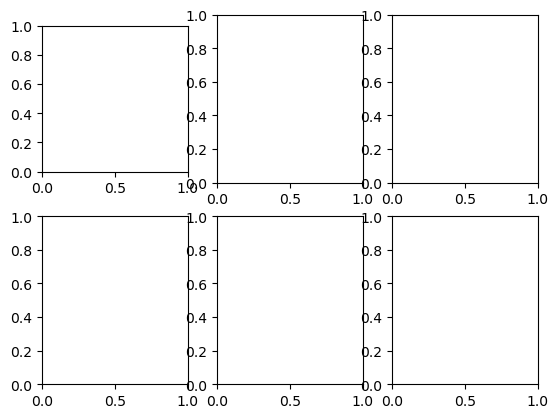

In [44]:
fig, axs = plt.subplots(2,3)
axs[0,0].imshow(X_test_im[0], cmap = "Greys")
axs[0,1].imshow(X_train_im[933].reshape([8,8]), cmap = "Greys")
axs[0,2].imshow(X_traind[361].reshape([8,8]), cmap = "Greys")
axs[1,0].imshow(X_traind[321].reshape([8,8]), cmap = "Greys")
axs[1,1].imshow(X_traind[1364].reshape([8,8]), cmap = "Greys")
axs[1,2].imshow(X_traind[121].reshape([8,8]), cmap = "Greys")